# CNN (Convolutional Neural Network):-
* CNN is basically used for image classification task.
* A CNN is a deep learning model that helps computer to see and understand images by automatically learning patterns like edges, shapes and object.
* CNN is commonly used for image recognition, face detection and object tracking.
* CNN contains 4 layers:
   *       Convolutional Layer
   *       Activation function Layer(relu layer)
   *       Pooling Layer
   *       Fully connected layer(ANN model)

### Convolutional Layer:-
* It is the heart of CNN.
* It uses kernel matrix to extract features like edges, corners and textures.

### Activation Function Layer:-
IT uses relu activation function to convert negative values to zero and give the positive as usual.

### Pooling Layer:-
* Pooling layer helps to reduce the size of the feature map by convolving a pool matrix over the extracted feature map
* It helps to keep the important informations and discard the unnecessary details.
* 2 Types:
  * Max Pooling:- It takes the largest value of the group
  * Average Pooling:- It takes the average value of the group

### Fully Connected Layer:-
* In fully connected layer after all features being extracted this convert the layer to 1D which acts as an input for the ANN Model.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [30]:
import warnings 
warnings.filterwarnings('ignore')

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [32]:
from keras.utils import to_categorical

In [33]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [34]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


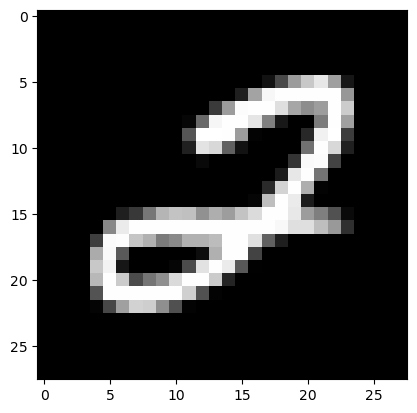

In [35]:
plt.imshow(xtrain[ytrain==2][100],cmap='gray')
plt.show()

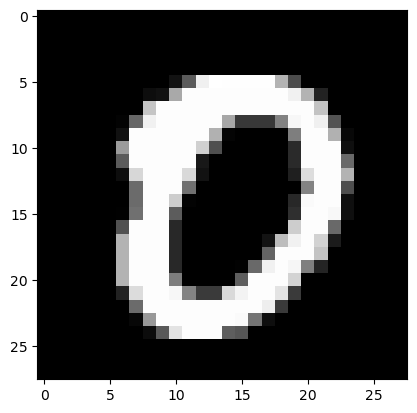

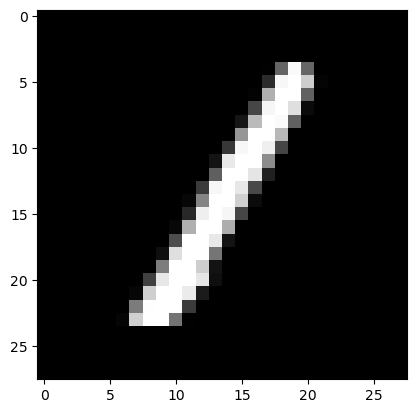

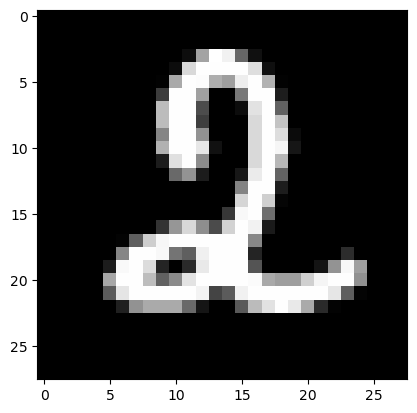

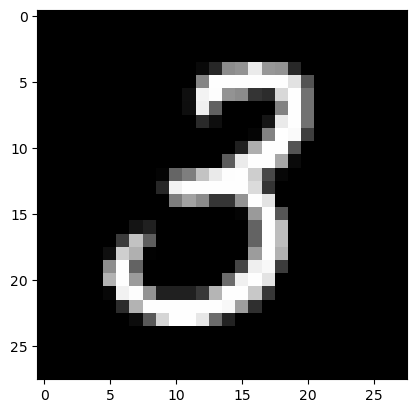

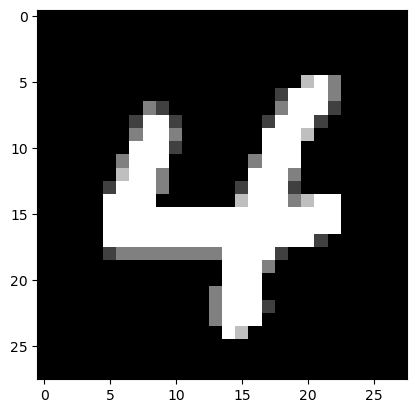

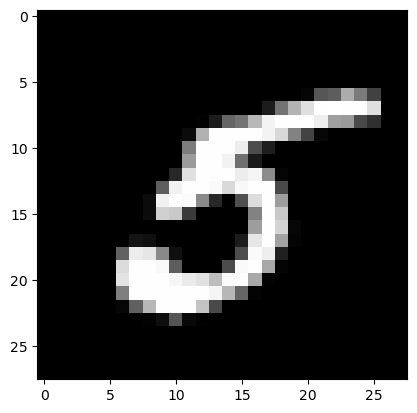

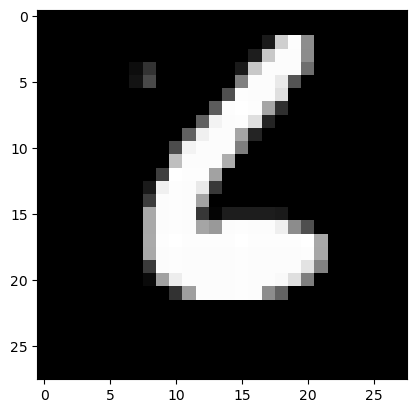

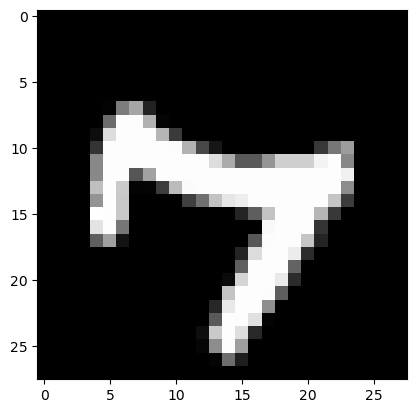

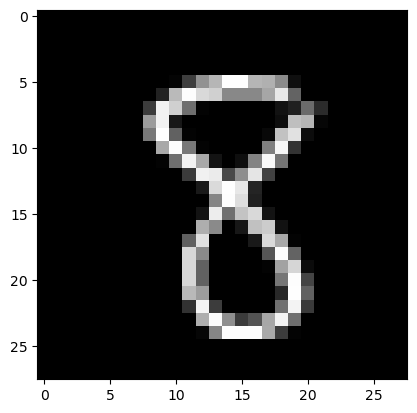

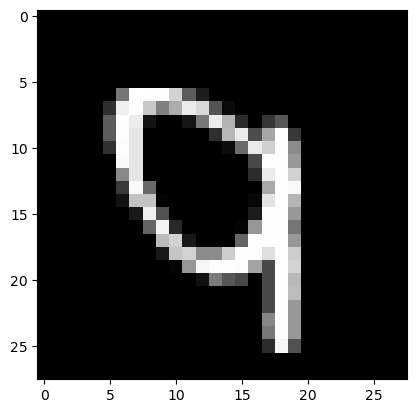

In [36]:
for i in range(0,10):
    plt.imshow(xtrain[ytrain==i][np.random.randint(0,500)], cmap = 'gray')
    plt.show()

In [37]:
ytrain = to_categorical(ytrain,10)
ytest = to_categorical(ytest,10)

In [38]:
xtrain = xtrain/255
xtest = xtest/255

In [39]:
# CNN Model:-
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [40]:
def Surya_Model():
    model = Sequential()
    # Convolution Layer with activation function layer
    model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation = 'relu'))

    # Max Pooling Layer:-
    model.add(MaxPooling2D(pool_size = (2,2)))

    # Flattening the layer:-
    model.add(Flatten())

    # Hidden Layer:-
    model.add(Dense(200,activation = 'relu'))
    model.add(Dense(150,activation = 'relu'))

    # Output Layer:-
    model.add(Dense(10,activation = 'softmax'))
    model.compile(Adam(learning_rate = 0.01),loss = 'categorical_crossentropy',metrics = ['accuracy'])
    return model

In [41]:
model = Surya_Model()
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 30)          │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4320)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 200)                 │         864,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 150)                 │          30,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896,640 (3.42 MB)

 Trainable params: 896,640 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(xtrain,ytrain,validation_split = 0.2,epochs = 10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.9020 - loss: 0.3216 - val_accuracy: 0.9691 - val_loss: 0.1152
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9718 - loss: 0.1065 - val_accuracy: 0.9747 - val_loss: 0.0869
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9767 - loss: 0.0847 - val_accuracy: 0.9687 - val_loss: 0.1911
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9778 - loss: 0.0988 - val_accuracy: 0.9738 - val_loss: 0.1342
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9841 - loss: 0.0634 - val_accuracy: 0.9689 - val_loss: 0.1438
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.9843 - loss: 0.0702 - val_accuracy: 0.9823 - val_loss: 0.1189
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9864 - loss: 0.0641 - val_accuracy: 0.9772 - val_loss: 0.1715
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9855 -

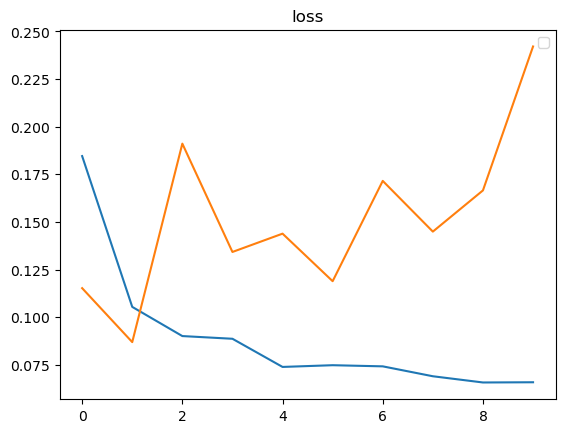

In [44]:
plt.plot((history.history['loss']))
plt.plot((history.history['val_loss']))
plt.legend('loss','val_loss')
plt.title('loss')
plt.show()

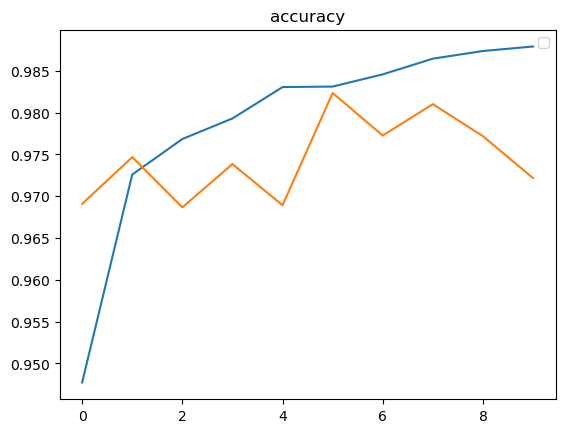

In [45]:
plt.plot((history.history['accuracy']))
plt.plot((history.history['val_accuracy']))
plt.legend('accuracy','val_accuracy')
plt.title('accuracy')
plt.show()

In [81]:
# Model Testing 
import cv2
import matplotlib.pyplot as plt

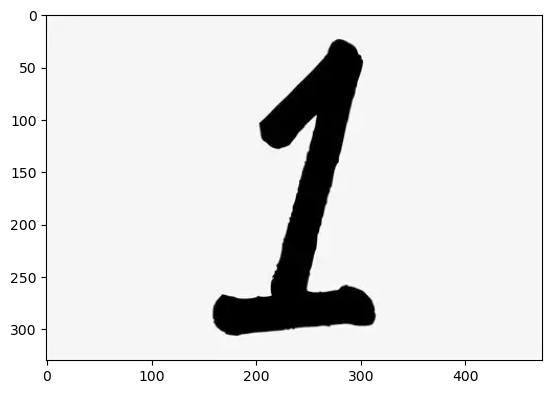

In [88]:
img1 = cv2.imread(r"C:\Users\surya\OneDrive\Desktop\AIML_CTTC\NOTES\hand written digit image.webp")
plt.imshow(img1,cmap = 'gray')
plt.show()

In [89]:
img1.shape

(330, 474, 3)

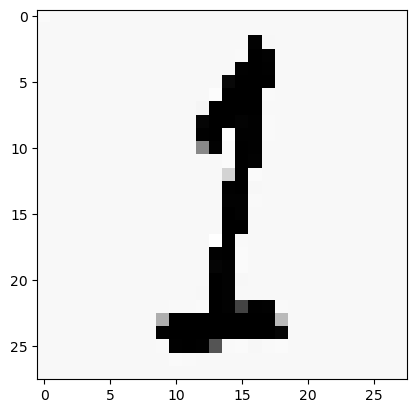

In [90]:
img1 = cv2.resize(img1,(28,28))
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
# img = cv2.bitwise_not(img)
plt.imshow(img1,cmap='gray')
plt.show()

In [93]:
img1 = img1/255
img1 = img1.reshape(1, 28, 28, 1)

In [94]:
pred = model.predict(img1)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


array([[0.06561227, 0.07159571, 0.11613962, 0.08884867, 0.05979221,
        0.09005734, 0.06242388, 0.08740446, 0.26730275, 0.09082314]],
      dtype=float32)

In [95]:
p = np.argmax(pred,axis = 1)
p

array([8], dtype=int64)